# 6.Biomedical Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

In [2]:
im = imageio.imread('snapshot/hand.png').astype('float64')

Data type: float64
Min. value: 3.0
Max value: 224.0


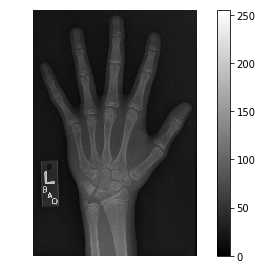

In [3]:
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.tight_layout()
plt.show()

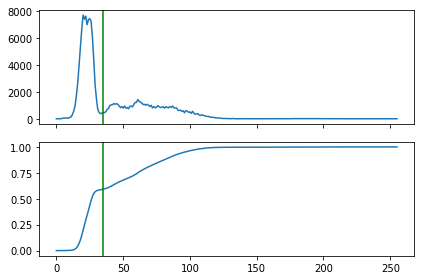

In [4]:
import scipy.ndimage as ndi
hist = ndi.histogram(im, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()
fig, axes = plt.subplots(2,1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[0].axvline(35,c="g")
axes[1].plot(cdf, label='CDF')
axes[1].axvline(35,c="g")
# plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
print(im.shape)

(480, 320)


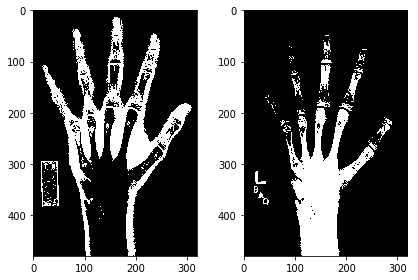

In [6]:
# Create skin and bone masks
mask_bone = im >= 75
mask_skin = (im >= 45) & (im < 75)

# Plot the masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
plt.tight_layout()
plt.show()

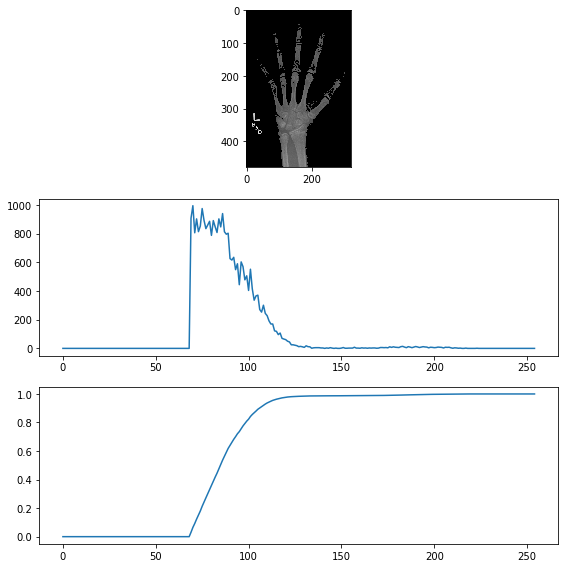

In [7]:
mask_bone = im >= 70
im_bone = np.where(mask_bone, im, 0)
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)
cdf = hist.cumsum() / hist.sum()
fig, axes = plt.subplots(3,1,figsize=(8,8))
axes[0].imshow(im_bone, cmap='gray')
axes[1].plot(hist)
axes[2].plot(cdf)
plt.tight_layout()
plt.show()

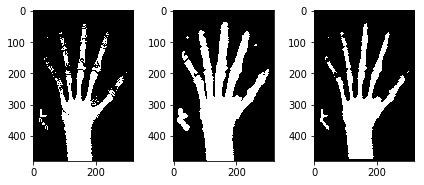

In [8]:
mask_bone = im >= 70
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')
plt.tight_layout()
plt.show()

float64 153600 153600


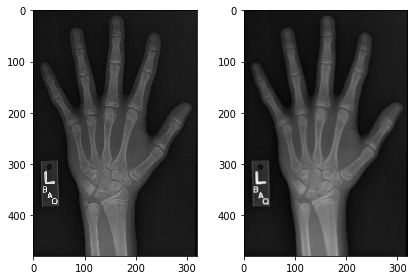

In [9]:
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

im_filt = ndi.convolve(im, weights)

print(im.dtype,im.size,im_filt.size)

fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')
plt.tight_layout()
plt.show()

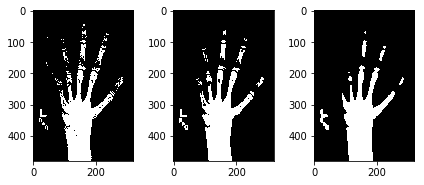

In [10]:
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 75, cmap='gray')
axes[1].imshow(im_s1 >= 75, cmap='gray')
axes[2].imshow(im_s3 >= 75, cmap='gray')
plt.tight_layout()
plt.show()

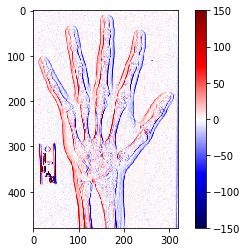

In [11]:
weights = [[1, 0, -1],
           [1, 0, -1], 
           [1, 0 ,-1]]

edges = ndi.convolve(im, weights)

plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar();

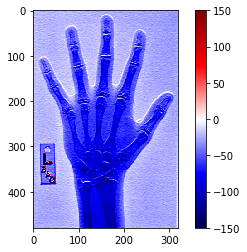

In [12]:
weights = [[1, 0, 1],
           [0, 0, 0], 
           [-1, -1 ,-1]]
edges = ndi.convolve(im, weights)
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar();

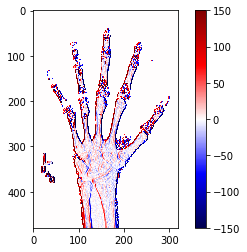

In [13]:
weights = [[1, 0, -1],
           [1, 0, -1], 
           [1, 0 ,-1]]
bone_edges = ndi.convolve(im_bone, weights)
plt.imshow(bone_edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar();

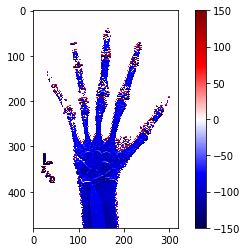

In [14]:
weights = [[1, 0, 1],
           [0, 0, 0], 
           [-1, -1 ,-1]]
edges = ndi.convolve(im_bone, weights)
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar();

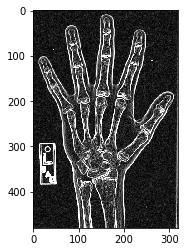

In [15]:
sobel_ax0 = ndi.sobel(im.astype('float64'), axis=0)
sobel_ax1 = ndi.sobel(im.astype('float64'), axis=1)

edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

plt.imshow(edges, cmap='gray', vmax=75);

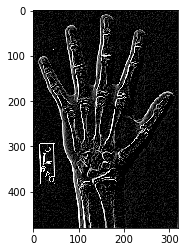

In [16]:
sobel_ax0 = ndi.sobel(im.astype('uint64'), axis=0)
sobel_ax1 = ndi.sobel(im.astype('uint64'), axis=1)

edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

plt.imshow(edges, cmap='gray', vmax=75);

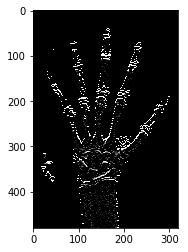

In [17]:
im_sobel_0=ndi.sobel(im_bone.astype('uint64'), axis=0)
plt.imshow(im_sobel_0, cmap='gray',vmax=75);

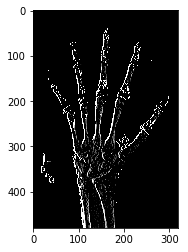

In [18]:
im_sobel_1=ndi.sobel(im_bone.astype('uint64'), axis=1)
plt.imshow(im_sobel_1, cmap='gray', vmax=75);

In [19]:
im_filt.min(),im_filt.max()

(6.6000000000000005, 195.69000000000003)

In [20]:
im_filt = ndi.median_filter(im, size=3)
range_filter = np.arange(im_filt.min(),im_filt.max(),20)
range_filter = range_filter[1:-2] # drop first & last element
print(len(range_filter))
range_filter

8


array([ 25.,  45.,  65.,  85., 105., 125., 145., 165.])

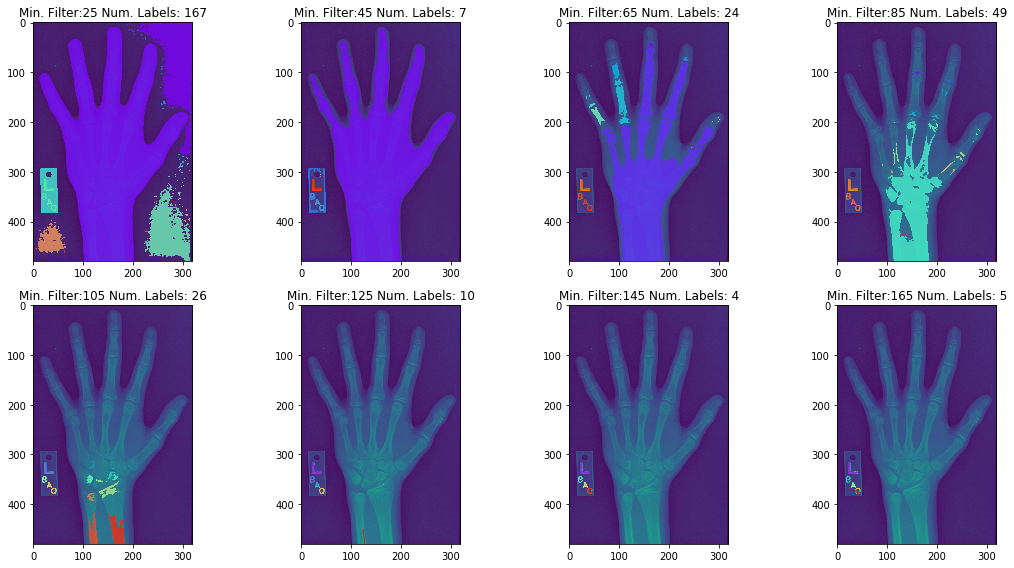

In [21]:
fig, axe = plt.subplots(ncols=4,nrows=2,figsize=(15,8))
labels_array = np.empty_like(range_filter)
for i, axe in enumerate(axe.flatten()):
    mask_start = np.where(im_filt > range_filter[i], 1, 0)
    mask = ndi.binary_closing(mask_start)
    labels, nlabels = ndi.label(mask)
    labels_array[i] = nlabels
    overlay = np.where(labels > 0, labels, np.nan)
    axe.imshow(im)
    axe.imshow(overlay, cmap='rainbow', alpha=0.75);
    axe.set_title('Min. Filter:%d Num. Labels: %d'% (range_filter[i],nlabels))
    
plt.tight_layout()
plt.show()

In [22]:
print(labels_array)
select_size = 2
select_range = labels_array.argsort()[-select_size-1:-1][::-1]
select_range

[167.   7.  24.  49.  26.  10.   4.   5.]


array([3, 4])

In [23]:
range_filter_2 = range_filter[select_range]
range_filter_2

array([ 85., 105.])

In [24]:
range_filter_2 = np.arange(range_filter_2.min(),range_filter_2.max(),2)
range_filter_2 = range_filter_2
print(len(range_filter_2))
range_filter_2

10


array([ 85.,  87.,  89.,  91.,  93.,  95.,  97.,  99., 101., 103.])

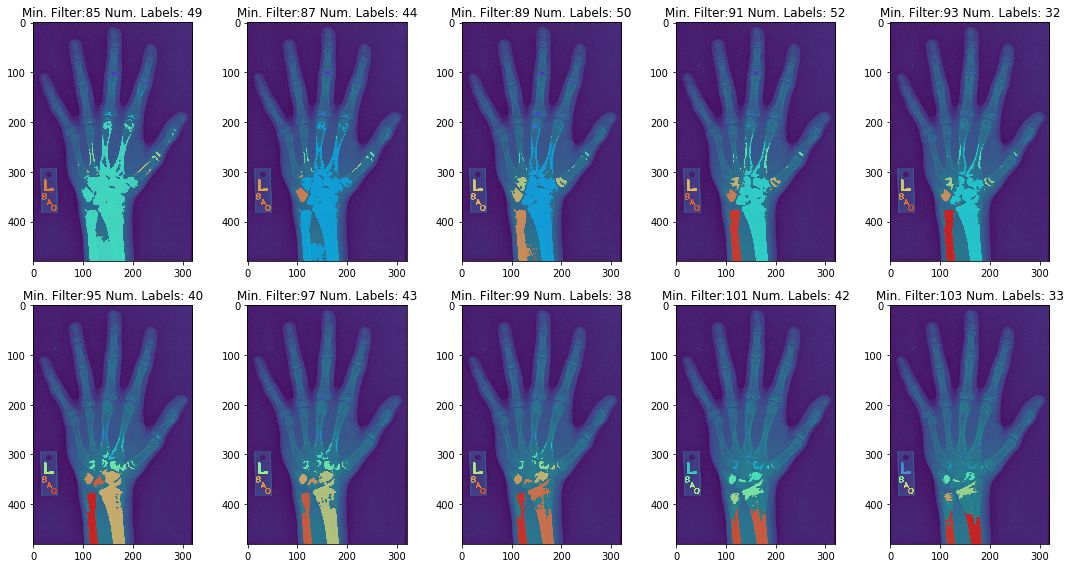

In [25]:
fig, axe = plt.subplots(ncols=5,nrows=2,figsize=(15,8))

im_filt = ndi.median_filter(im, size=3)    
for i, axe in enumerate(axe.flatten()):
    mask_start = np.where(im_filt > range_filter_2[i], 1, 0)
    mask = ndi.binary_closing(mask_start)
    labels, nlabels = ndi.label(mask)
    overlay = np.where(labels > 0, labels, np.nan)
    axe.imshow(im)
#     axe.axis('off')
    axe.imshow(overlay, cmap='rainbow', alpha=0.75);
    axe.set_title('Min. Filter:%d Num. Labels: %d'% (range_filter_2[i],nlabels))
    
plt.tight_layout()
plt.savefig('snapshot/biomedical_bones_detection.jpg',bbox_inches='tight')
plt.show()

In [26]:
# 95 min
mask_start = np.where(im_filt > 95, 1, 0)
mask = ndi.binary_closing(mask_start)
labels, nlabels = ndi.label(mask)
nlabels

40

/Users/romelldominguez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


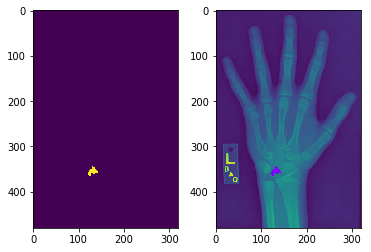

In [27]:
lv_val = labels[360, 134]
lv_mask = np.where(labels == lv_val, 1, np.nan)
plt.subplot(121)
plt.imshow(lv_mask>0, )
plt.subplot(122)
plt.imshow(im_filt)
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

In [28]:
labels, nlabels = ndi.label(mask)
lv_val = labels[360, 134]
lv_mask = np.where(labels == lv_val, 1, 0)

bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Box :', bboxes[0])

Number of objects: 1
Box : (slice(344, 366, None), slice(121, 143, None))


(22, 22)


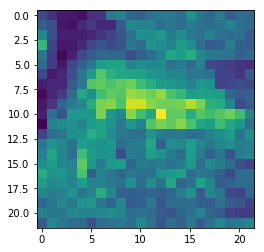

In [29]:
im_lv = im[bboxes[0]]
print(im_lv.shape)
plt.imshow(im_lv);

Original shape: (1920, 1280), upsampled  shapes: (1920, 1280)


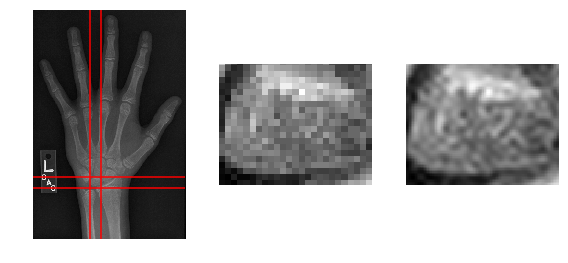

In [33]:
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

print('Original shape: %s, upsampled  shapes: %s' % (up0.shape,up5.shape))

fig, axes = plt.subplots(1, 3,figsize=(8,5))
axes[0].imshow(im,cmap='gray')
axes[0].axvline(x=120,c='r')
axes[0].axvline(x=120+im_lv.shape[0],c='r')
axes[0].axhline(y=350,c='r')
axes[0].axhline(y=350+im_lv.shape[1],c='r')
axes[0].axis('off')
axes[1].imshow(up0[1400:1480,480:580],cmap='gray')
axes[1].axis('off')
axes[2].imshow(up5[1400:1480,480:580],cmap='gray')
axes[2].axis('off')
plt.tight_layout();